In [4]:
import camb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from healpy import synfast,mollview,anafast

import sys, platform, os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [5]:
camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
sys.path.insert(0,camb_path)
import camb
from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.0 installed at /home/jkhan/anaconda3/lib/python3.8/site-packages/camb


In [7]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(2500, lens_potential_accuracy=0)
#calculate results for these parameters
results = camb.get_results(pars)
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


(2551, 4)


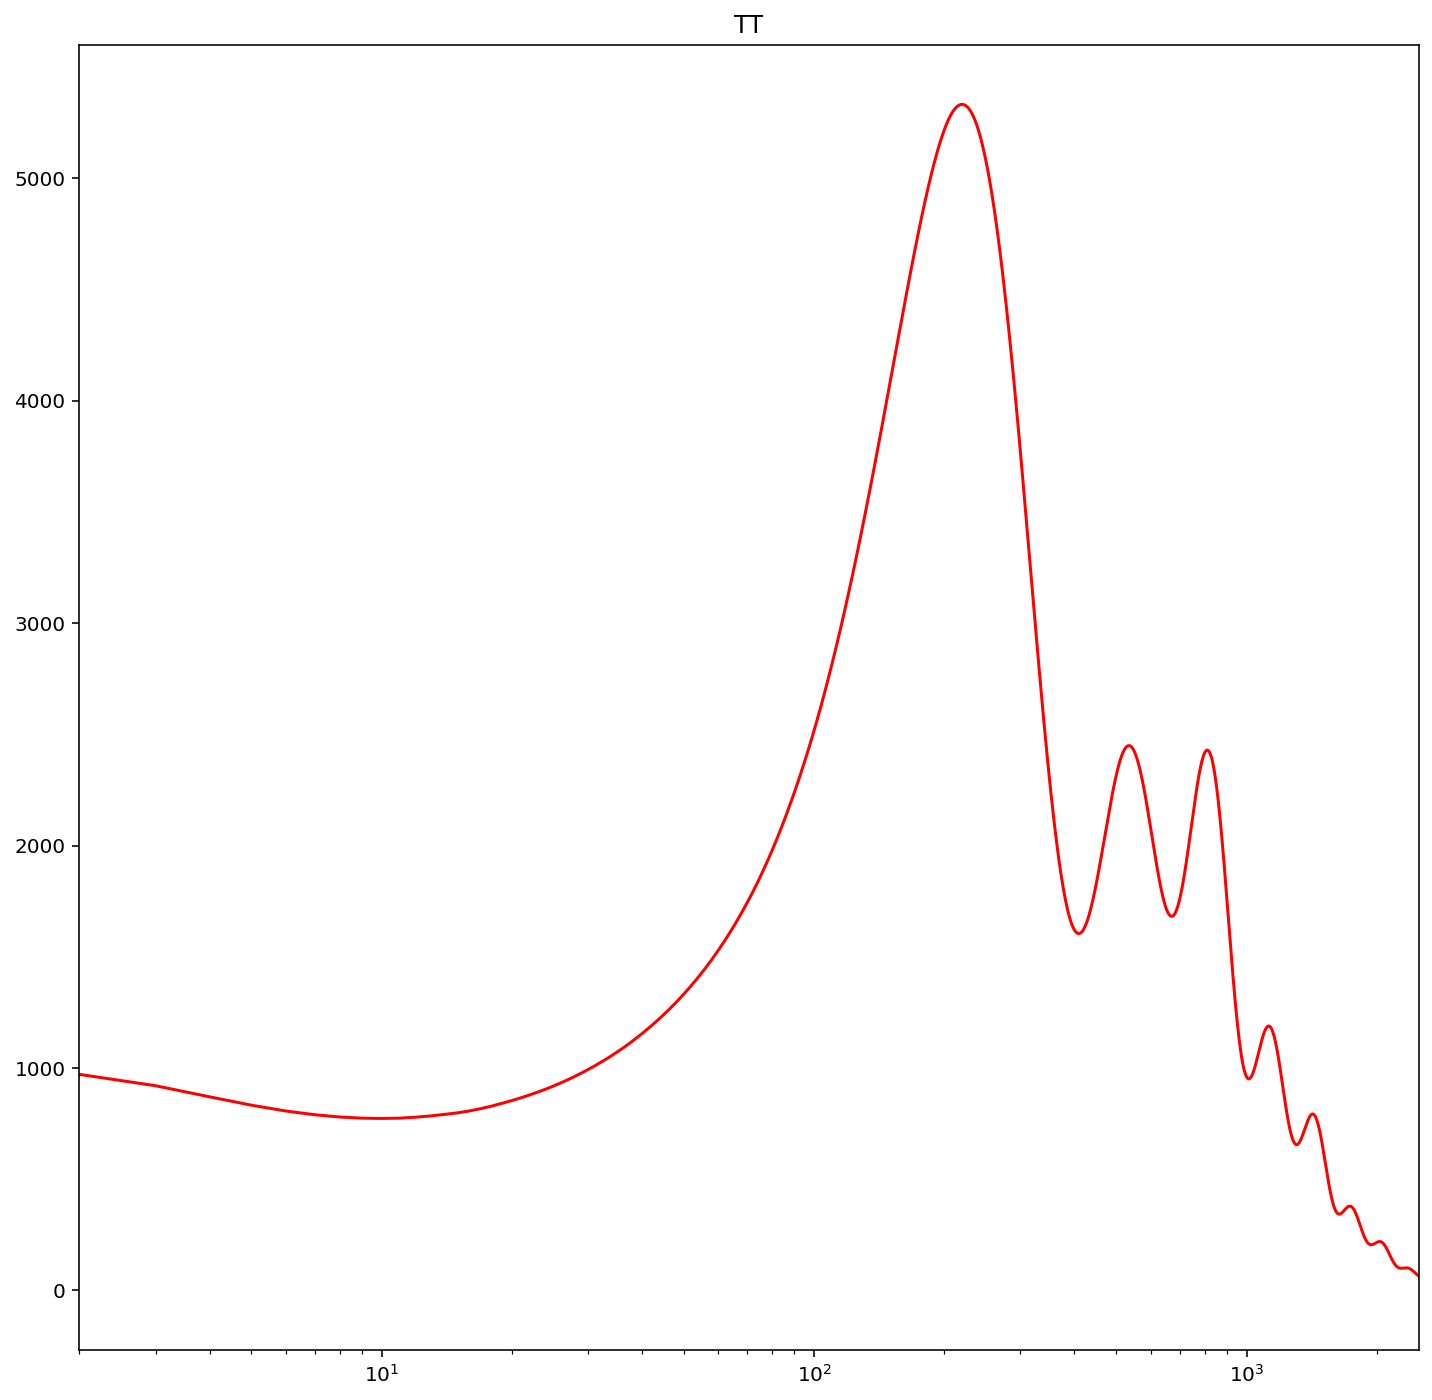

In [23]:
#calculate results for these parameters
results = camb.get_results(pars)
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.plot(ls,unlensedCL[:,0], color='r')
ax.set_title('TT')
ax.set_xlim([2,2500])
ax.set_xscale("log")

/home/jkhan/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:433: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  warnings.warn(
/home/jkhan/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:822: UserWarning: Sigma is 0.000000 arcmin (0.000000 rad) 
  warnings.warn(
/home/jkhan/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:827: UserWarning: -> fwhm is 0.000000 arcmin
  warnings.warn(
/home/jkhan/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:920: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("viridis"))
  newcm.set_over(newcm(1.0))
/home/jkhan/anaconda3/lib/python3.8/site-packages/healpy/projaxes.py:921:

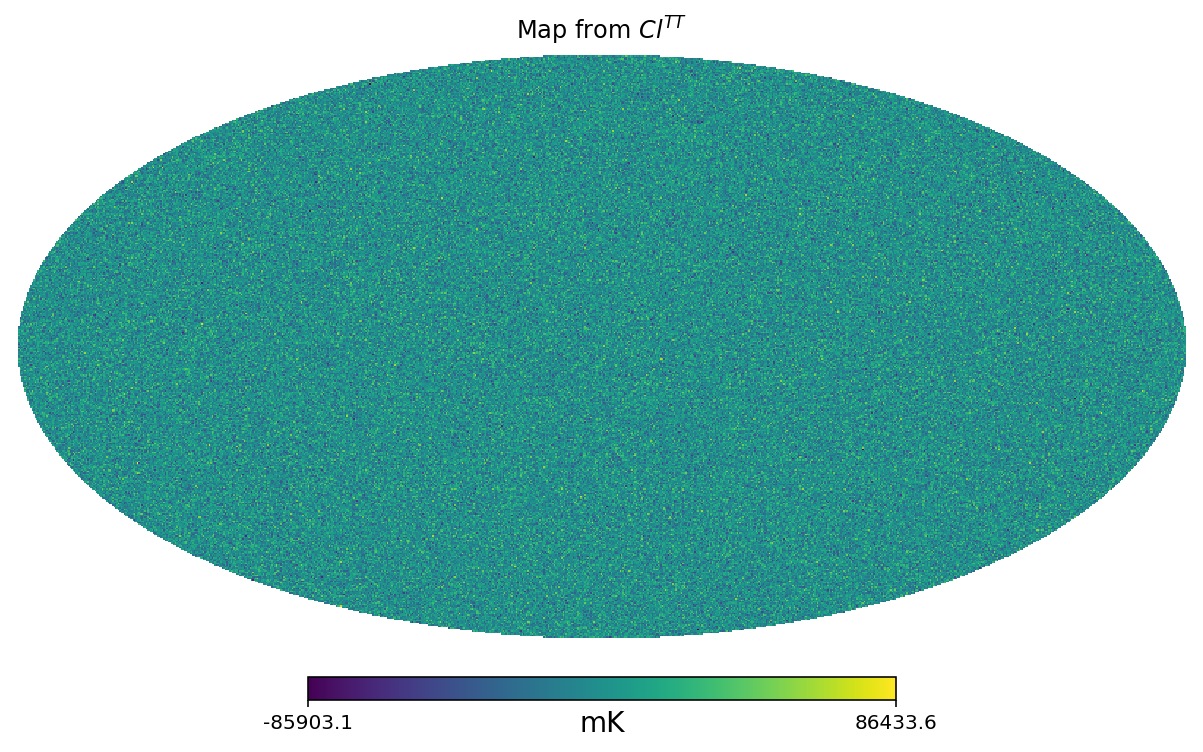

In [9]:
map1=synfast(unlensedCL[:,0],nside=1024)
mollview(
    map1,
    title="Map from $Cl^{TT}$",
    unit="mK"
)

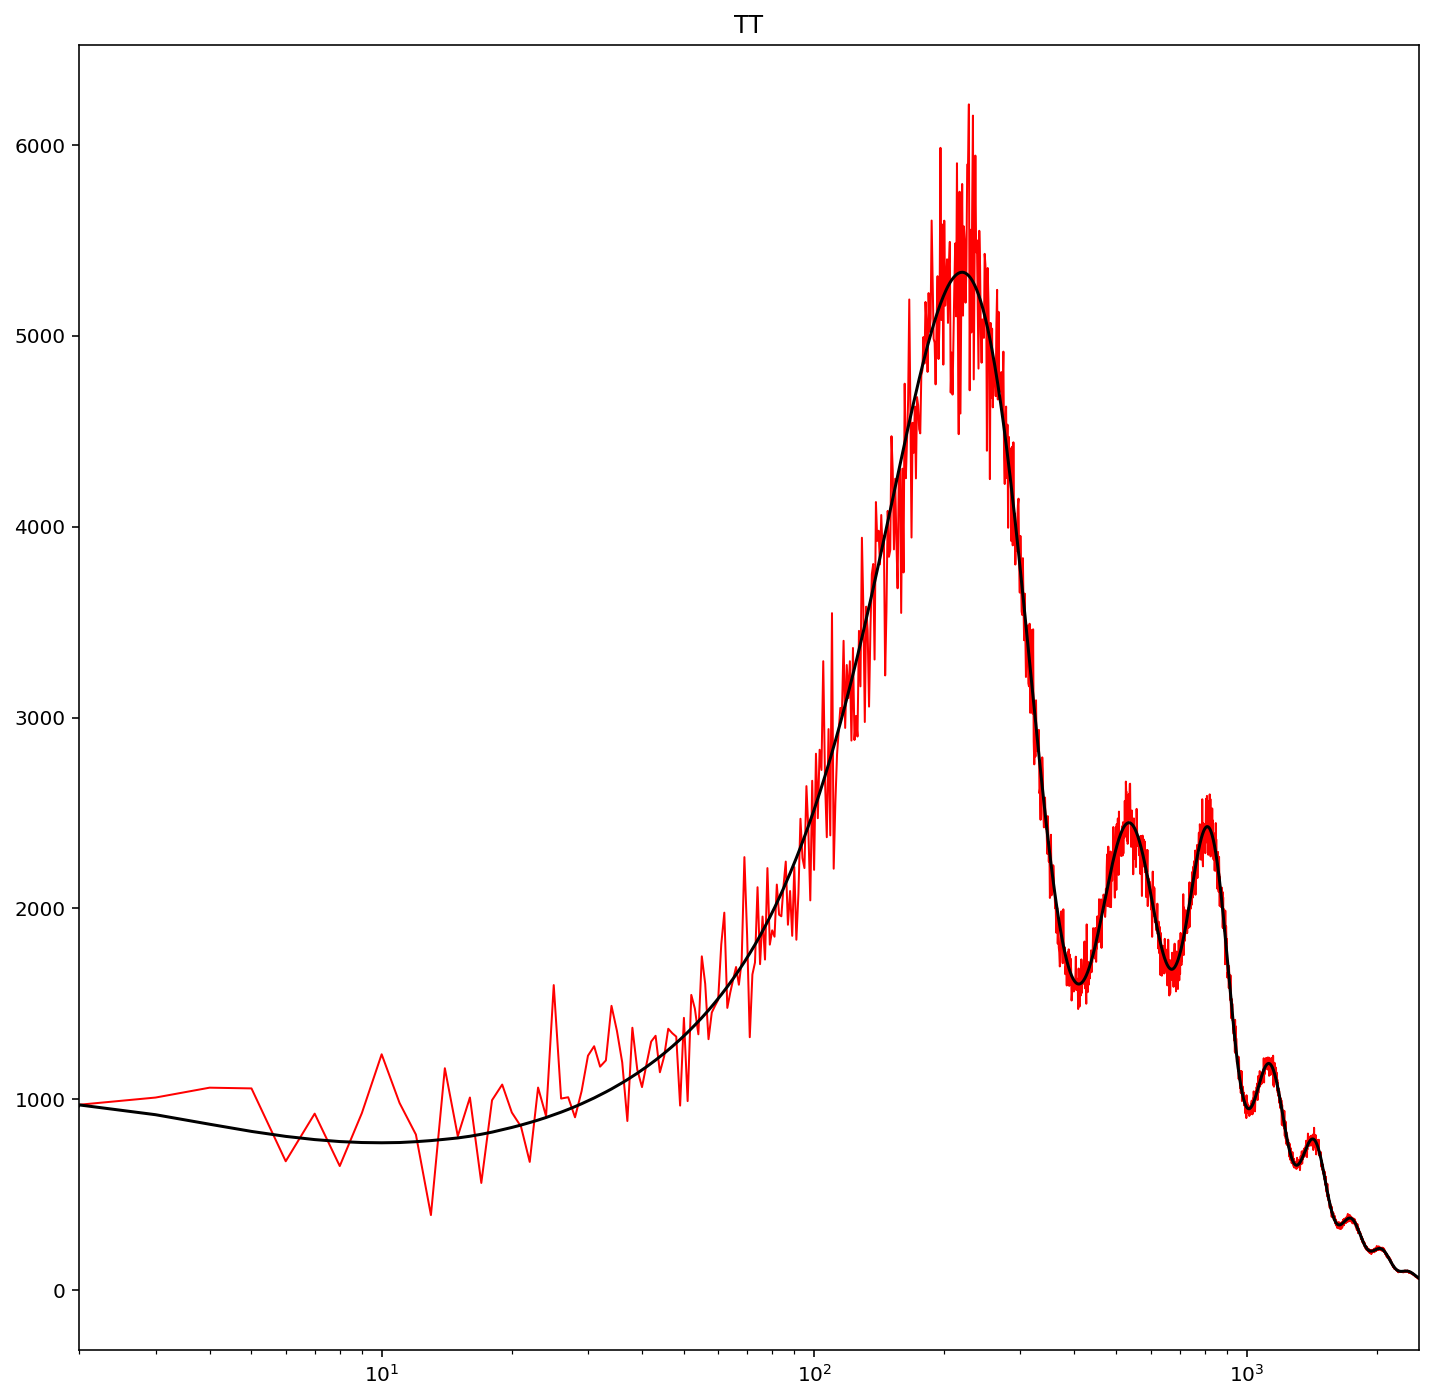

In [20]:
cl=anafast(map1)
ls = np.arange(cl.shape[0])
fig, ax = plt.subplots(1,1, figsize = (12,12))
ax.plot(ls,cl, color='r',linewidth=1)
ax.set_title('TT')
ax.set_xlim([2,2500])
ls = np.arange(totCL.shape[0])
ax.plot(ls,unlensedCL[:,0], color='k')
ax.set_title('TT')
ax.set_xscale("log")